In [1]:
# -*- coding: utf-8 -*-

# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [2]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [3]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [4]:
# Write your code here.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [5]:
# Write your code here.
from sklearn.model_selection import cross_validate

logreg_results = cross_validate(model, data, target,
                                cv=cv, n_jobs=2)

test_score_logreg = pd.Series(
     logreg_results['test_score'], name='logreg')

test_score_logreg.describe()

count    10.000000
mean      0.813832
std       0.002085
min       0.810327
25%       0.812590
50%       0.814279
75%       0.815435
max       0.816388
Name: logreg, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [6]:
# Write your code here.
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent')

dummy_results = cross_validate(dummy_model, data, target,
                               cv=cv, n_jobs=2)

test_score_dummy = pd.Series(
    dummy_results['test_score'], name='dummy')

test_score_dummy.describe()

count    10.000000
mean      0.760022
std       0.002251
min       0.756808
25%       0.757883
50%       0.760534
75%       0.761834
max       0.763114
Name: dummy, dtype: float64

Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [7]:
# Write your code here.
all_test_scores = pd.concat([test_score_logreg, test_score_dummy],
                            axis='columns')

all_test_scores

,logreg,dummy
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814709,0.761885
6,0.813112,0.757463
7,0.810327,0.757176
8,0.812416,0.761885
9,0.816388,0.763114



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

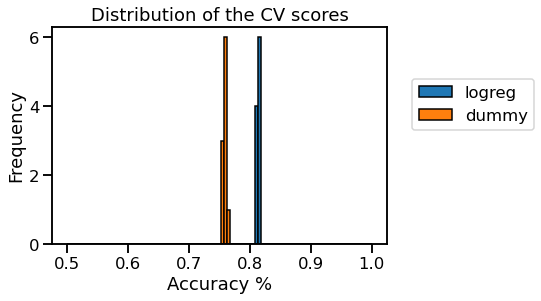

In [8]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(start=0.5, stop=1, num=100)

all_test_scores.plot.hist(bins=bins, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.xlabel('Accuracy %')
plt.title('Distribution of the CV scores');

We observe that the two histograms are well separated. Therefore the dummy classifier with the strategy most_frequent has a much lower accuracy than the logistic regression classifier. We conclude that the logistic regression model can successfully find predictive information in the input features to improve upon the baseline.

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [9]:
# Write your code here.
stratified_dummy = DummyClassifier(strategy='stratified')

results_stratified = cross_validate(stratified_dummy, data, target,
                                    cv=cv, n_jobs=2)

test_score_dummy_stratified = pd.Series(
    results_stratified['test_score'], name='stratified_dummy')

test_score_dummy_stratified.describe()

count    10.000000
mean      0.636424
std       0.001980
min       0.632857
25%       0.635621
50%       0.637136
75%       0.637351
max       0.639572
Name: stratified_dummy, dtype: float64

In [10]:
uniform_dummy = DummyClassifier(strategy='uniform')

results_uniform = cross_validate(uniform_dummy, data, target,
                                 cv=cv, n_jobs=2)

test_score_dummy_uniform = pd.Series(
    results_uniform['test_score'], name='uniform_dummy')

test_score_dummy_uniform.describe()

count    10.000000
mean      0.499971
std       0.003979
min       0.491176
25%       0.498086
50%       0.500512
75%       0.502314
max       0.505917
Name: uniform_dummy, dtype: float64

In [11]:
all_test_scores = pd.concat([test_score_logreg, 
                             test_score_dummy,
                             test_score_dummy_stratified,
                             test_score_dummy_uniform],
                            axis='columns')

all_test_scores

,logreg,dummy,stratified_dummy,uniform_dummy
0,0.815937,0.760329,0.637075,0.497564
1,0.813849,0.756808,0.637320,0.500143
2,0.815036,0.759142,0.637361,0.505917
3,0.815569,0.760739,0.633758,0.501699
4,0.810982,0.761681,0.635805,0.500880
5,0.814709,0.761885,0.637730,0.491176
6,0.813112,0.757463,0.639572,0.499652
7,0.810327,0.757176,0.637197,0.497482
8,0.812416,0.761885,0.632857,0.502518
9,0.816388,0.763114,0.635560,0.502682


Text(0.5, 1.0, 'Distribution of the test scores')

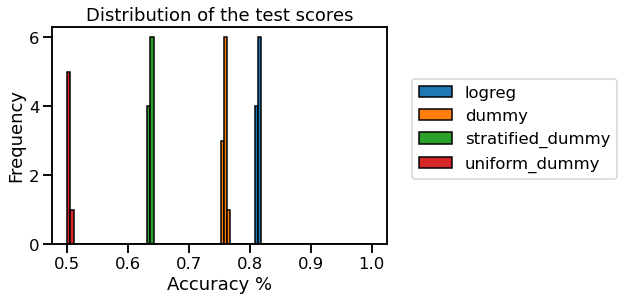

In [12]:
all_test_scores.plot.hist(bins=bins, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.xlabel('Accuracy %')
plt.title('Distribution of the test scores')

We see that using strategy="stratified", the results are much worse than with the most_frequent strategy. Since the classes are imbalanced, predicting the most frequent involves that we will be right for the proportion of this class (~75% of the samples). However, the "stratified" strategy will randomly generate predictions by respecting the training set’s class distribution, resulting in some wrong predictions even for the most frequent class, hence we obtain a lower accuracy.

This is even more so for the strategy="uniform": this strategy assigns class labels uniformly at random. Therefore, on a binary classification problem, the cross-validation accuracy is 50% on average, which is the weakest of the three dummy baselines.

Note: one could argue that the "uniform" or strategy="stratified" strategies are both valid ways to define a “chance level” baseline accuracy for this classification problem, because they make predictions “by chance”.

Another way to define a chance level would be to use the [sklearn.model_selection.permutation_test_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html) utility of scikit-learn. Instead of using a dummy classifier, this function compares the cross-validation accuracy of a model of interest to the cross-validation accuracy of this same model but trained on randomly permuted class labels. The permutation_test_score therefore defines a chance level that depends on the choice of the class and hyper-parameters of the estimator of interest. When training on such randomly permuted labels, many machine learning estimators would end up approximately behaving much like the DummyClassifier(strategy="most_frequent") by always predicting the majority class, irrespective of the input features. As a result, this "most_frequent" baseline is sometimes called the “chance level” for imbalanced classification problems, even though its predictions are completely deterministic and do not involve much “chance” anymore.

Defining the chance level using permutation_test_score is quite computation-intensive because it requires fitting many non-dummy models on random permutations of the data. **Using dummy classifiers as baselines is often enough for practical purposes.** For imbalanced classification problems, the "most_frequent" strategy is the strongest of the three baselines and therefore the one we should use.